In [2]:
%run "C:\Users\neoSTORM6\Documents\ImageAnalysis3\required_files\Startup_py3.py"
sys.path.append(r"C:\Users\neoSTORM6\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *
print(os.getpid())

69080


In [36]:
image_folder = r'D:\Pu\20230531-NTS_24edits_sv40_dense\H1M2'
#image_folder = r'T:\Pu\20230512-msBrain_smFISH_ns\Cd3e'
image_basenames = sorted([_fl for _fl in os.listdir(image_folder) if _fl.split(os.extsep)[-1] =='dax'])
print(image_folder)
print(image_basenames)

D:\Pu\20230531-NTS_24edits_sv40_dense\H1M2
['Conv_zscan_00.dax', 'Conv_zscan_01.dax', 'Conv_zscan_02.dax', 'Conv_zscan_03.dax', 'Conv_zscan_04.dax', 'Conv_zscan_05.dax', 'Conv_zscan_06.dax', 'Conv_zscan_07.dax', 'Conv_zscan_08.dax', 'Conv_zscan_09.dax', 'Conv_zscan_10.dax', 'Conv_zscan_11.dax', 'Conv_zscan_12.dax', 'Conv_zscan_13.dax', 'Conv_zscan_14.dax', 'Conv_zscan_15.dax', 'Conv_zscan_16.dax', 'Conv_zscan_17.dax', 'Conv_zscan_18.dax', 'Conv_zscan_19.dax', 'Conv_zscan_20.dax', 'Conv_zscan_21.dax', 'Conv_zscan_22.dax', 'Conv_zscan_23.dax', 'Conv_zscan_24.dax', 'Conv_zscan_25.dax', 'Conv_zscan_26.dax', 'Conv_zscan_27.dax', 'Conv_zscan_28.dax', 'Conv_zscan_29.dax', 'Conv_zscan_30.dax']


In [37]:
image_filename = os.path.join(image_folder, image_basenames[-2])
#image_filename = r'D:\Pu\20230510-4T1_edits_11k_ns\H6M7\Conv_zscan_125.dax'
print(image_filename)

im2 = ia.visual_tools.batch_load_dax(image_filename)

#split by channel
#image_channels = [750,647,561,488, 405]
image_channels = [750,647,561,488]
#image_channels = [750,647,488,405]
#image_channels = [750,647,488]
splitted_ims1 = ia.io_tools.load.split_im_by_channels(im2, 
                                                      image_channels,
                                                      image_channels,
                                                      num_buffer_frames=0, 
                                                      single_im_size=[30,2048,2048])

D:\Pu\20230531-NTS_24edits_sv40_dense\H1M2\Conv_zscan_29.dax


<IPython.core.display.Javascript object>


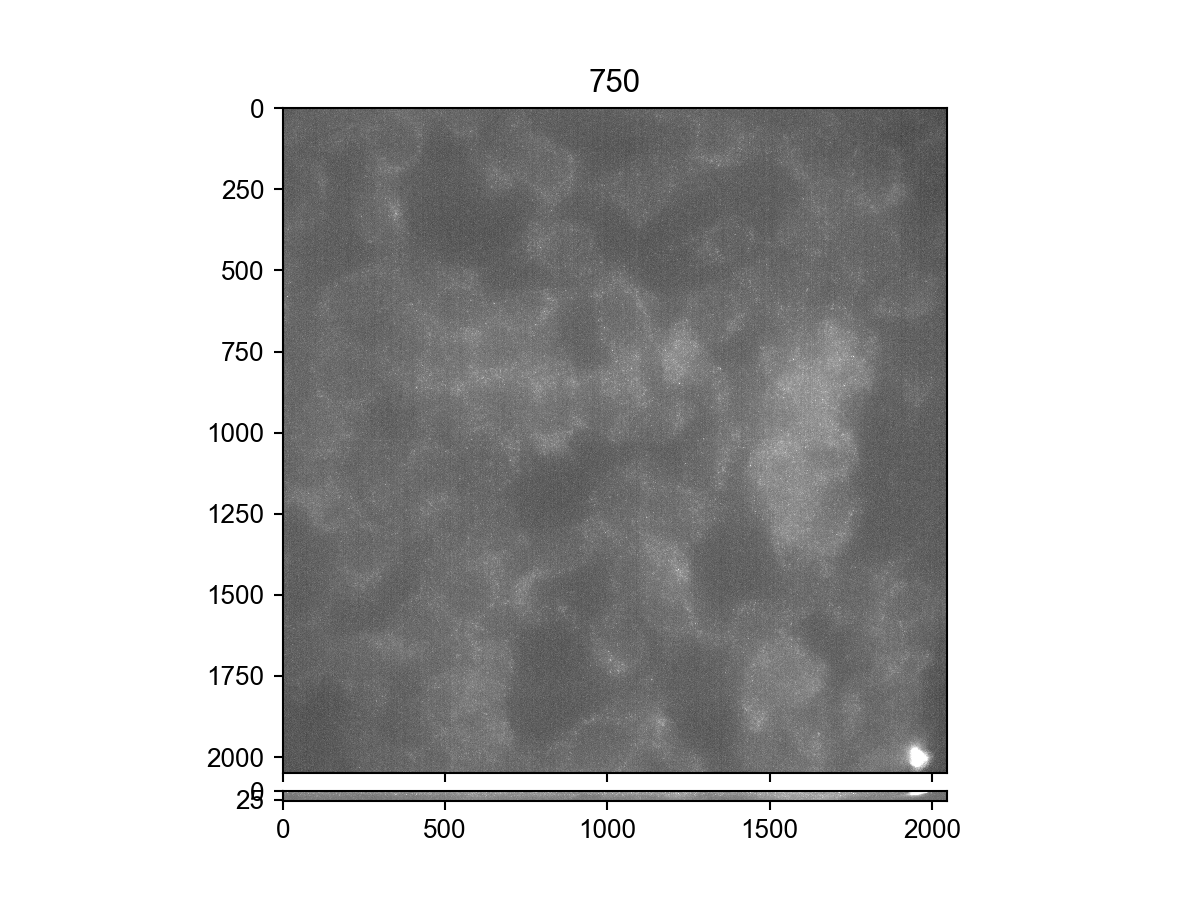

In [38]:
%matplotlib notebook
f = plt.figure(dpi=120)
ia.visual_tools.imshow_mark_3d_v2(splitted_ims1, fig=f,
                                  image_names=image_channels, 
                                  min_max_default=[1000,20000],
                                 )

In [187]:
res = np.array([
    [855,319],
    [883,1189],
    [1741,935],
]) - \
np.array([
    [331,763],
    [371,1631],
    [1229,1365],
])
res

array([[ 524, -444],
       [ 512, -442],
       [ 512, -430]])

In [188]:
res.mean(0)

array([ 516.        , -438.66666667])

In [140]:
-1365, 1650

(450.0, -126.0)

In [191]:
np.array([-1376.8, 1578.4]) - np.array([1,-1]) * np.flipud(res.mean(0)) * 0.108

array([-1329.424,  1634.128])

In [201]:
np.array([1,-1]) * np.flipud(res.mean(0)) * 0.108 * 2

array([ -94.752, -111.456])

# Ref image

In [198]:
ref_image_filename = r'\\10.245.74.212\Chromatin_NAS_2\Pu\20230510-4T1_edits_11k_ns\H0M1\Conv_zscan_125.dax'
print(ref_image_filename)

ref_im = ia.visual_tools.batch_load_dax(ref_image_filename)

#split by channel
image_channels = [750,647,561,488,405]
splitted_ref_ims = ia.io_tools.load.split_im_by_channels(ref_im, 
                                                      image_channels,
                                                      image_channels,
                                                      num_buffer_frames=0, 
                                                      single_im_size=[50,2048,2048])

\\10.245.74.212\Chromatin_NAS_2\Pu\20230510-4T1_edits_11k_ns\H0M1\Conv_zscan_125.dax


<IPython.core.display.Javascript object>


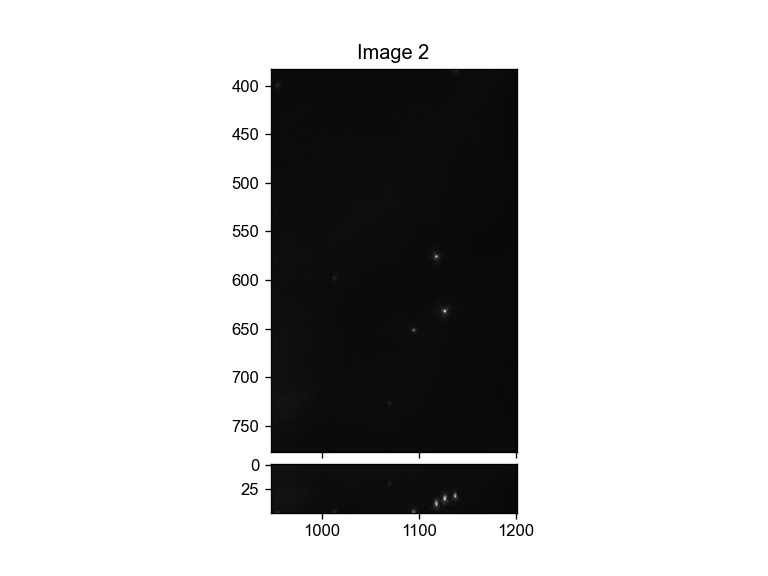

In [212]:
%matplotlib notebook
f = plt.figure(dpi=120)
ia.visual_tools.imshow_mark_3d_v2([splitted_ims1[-1],splitted_ref_ims[-2]], fig=f,
                                  #image_names=image_channels, 
                                  min_max_default=[100,5000],
                                 )

<IPython.core.display.Javascript object>


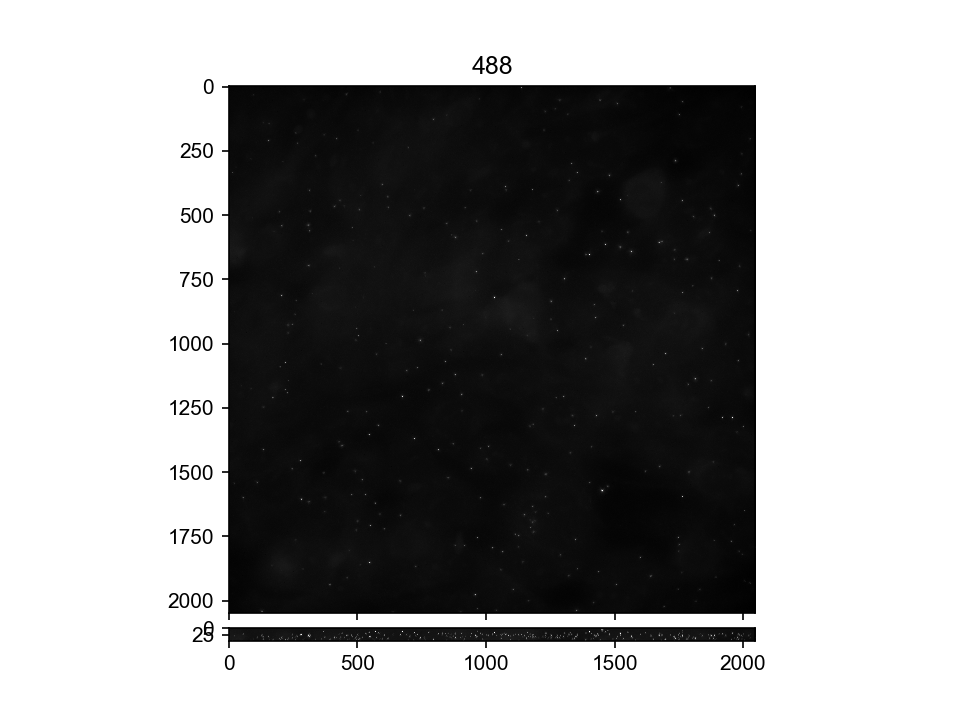

In [145]:
%matplotlib notebook
f = plt.figure(dpi=150)
ia.visual_tools.imshow_mark_3d_v2(splitted_ref_ims, fig=f,
                                  image_names=image_channels, min_max_default=[1000,30000])

In [211]:
%matplotlib notebook
ia.visual_tools.imshow_mark_3d_v2([splitted_ims1[-2], splitted_ims2[-2]], )

NameError: name 'splitted_ims2' is not defined